In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle
from kepler_func import *
from IPython.core.display import display, HTML

display(HTML('''
<style>
.output_scroll {
    overflow-x: auto !important;
    overflow-y: visible !important;
    max-height: none !important;
}
</style>
'''))

%matplotlib inline


/var/folders/d2/967f_3k57458fwy_1s1dh8_w0000gn/T/ipykernel_90308/1737583335.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Get some data from NASA Horizons

In [22]:
# Define planet IDs
planets = {
    'Mercury': 199,
    'Venus': 299,
    'Earth': 399,
    'Mars': 499
}

colors = {
        'Mercury': 'gray',
        'Venus': 'orange',
        'Earth': 'blue',
        'Mars': 'red'
    }

# Define epoch for orbital elements (Julian Date for 2021-Jan-01)
epoch = {'start': '2008-01-06', 'stop': '2009-01-06', 'step': '30d'}
# Define observation time range
obs_epochs = {'start': '1993-01-01', 'stop': '2023-01-01', 'step': '30d'}

if os.path.exists('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/NASA_data.pkl'):
    dataset = pickle.load(open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/NASA_data.pkl', 'rb'))
    orbitalObs_df, orbitalParams_df, true_anomaly_values_df, multi_orbitalParams_df, multi_orbitalObs_df = dataset
else:
    orbitalObs_df, orbitalParams_df, true_anomaly_values_df, multi_orbitalParams_df, multi_orbitalObs_df = get_orbital_observations(planets, epoch, obs_epochs)
    with open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/NASA_data.pkl', 'wb') as file:
            pickle.dump([orbitalObs_df, orbitalParams_df, true_anomaly_values_df, multi_orbitalParams_df, multi_orbitalObs_df], file)

#print(true_anomaly_values_df.head())
#print(orbitalParams_df.head())
#print(orbitalObs_df.head())

In [23]:
if False:
    orbitalObs_df, orbitalParams_df, true_anomaly_values_df, multi_orbitalParams_df, multi_orbitalObs_df = dataset
    
    planetsIds = [199, 299, 399, 499, 599, 699, 799, 899, 999]
    indices = [np.where(np.asarray(multi_orbitalParams_df['target'].tolist())==id)[0][0] for id in planetsIds]
    
    selected_elements = [multi_orbitalParams_df['target'].tolist()[i] for i in indices]
    
    runIRAS(selected_elements, None, multi_orbitalObs_df, multi_orbitalParams_df, runOn2D=False, runOn2D_v=False, runCoordinates_n_Velocities=True, externalReport=True)

In [27]:
opdf = multi_orbitalParams_df[['a','e','T']]#[['a','e','i', 'Omega', 'w','T']]#[['a','e','T']]
opdf = opdf.copy()
opdf['a']=np.log(opdf['a'])
opdf['e']=np.log(opdf['e'])
opdf['T']=np.log(opdf['T'])
#observations2IRAS = np.log(opdf.to_numpy()[None])
observations2IRAS = opdf.to_numpy()[None]
observations_tVec = np.repeat(np.arange(observations2IRAS.shape[1])[None,:,None], observations2IRAS.shape[0], 0) 
hypotheses_regulations = None

observations_noisy = observations2IRAS
for featureIdx in range(observations_noisy.shape[2]):
    std = observations2IRAS[:,:,featureIdx].flatten().std()
    observations_noisy[:,:,featureIdx] = observations2IRAS[:,:,featureIdx] + 1e-2*std*np.random.randn(observations2IRAS.shape[0], observations2IRAS.shape[1])
#hypotheses_regulations_pearson = (np.power(observations_noisy[:,:,-1], 2) - np.power(observations_noisy[:,:,0], 3))[:,:,None]
#hypotheses_regulations_pearson = (np.power(observations_noisy[:,:,-1], 2) / np.power(observations_noisy[:,:,0], 3))[:,:,None]
#hypotheses_regulations_pearson = (2*np.log(observations_noisy[:,:,-1]) / 3*np.log(observations_noisy[:,:,0]))[:,:,None]
hypotheses_regulations_pearson = (2*observations_noisy[:,:,-1] - 3*observations_noisy[:,:,0])[:,:,None]

#plt.figure()
#plt.scatter(x=np.power(observations_noisy[:,:,0],3),y=np.power(observations_noisy[:,:,-1],2))

#plt.figure()
#plt.scatter(x=np.power(observations_noisy[:,:,0],1),y=np.power(observations_noisy[:,:,-1],1))

In [28]:
opdf.columns
#np.isnan(hypotheses_regulations_pearson).any()

Index(['a', 'e', 'T'], dtype='object')

epoch 499 nMSE = 0.162455
Polynomial Regression Equation with corr 0.86:
mean(y) = 11.8; y = 1.765879631 + -2.544350624*x0 + 0.002323508*x1 + 1.700442314*x2


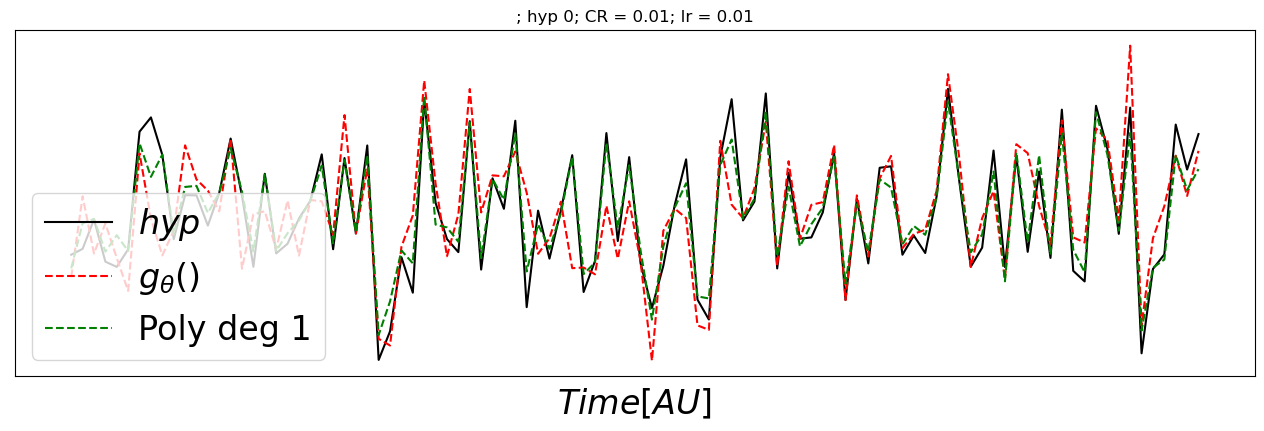

validation. nativeIRAS Adam epoch 499: %Selected = 2, CR(zeta=1) = 0.012, CR = 0.98, ; errorHyp 0 = -4.89 db
hyp 0: Pearson correlation between learned combination g() and g^*() (mean,std) = 0.838, 0.0
Pearson correlation between the learned combination g() and the desired g^*() over 1 runs nan, nan


/Users/ron.teichner/Projects/IRAS/IRAS.py:1081: RuntimeWarning: Mean of empty slice.
  print(f'Pearson correlation between the learned combination g() and the desired g^*() over {nRuns} runs {str(round(np.asarray(pearsonCorr).mean(), 3))}, {str(round(np.asarray(pearsonCorr).std(), 3))}')
/Users/ron.teichner/opt/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ron.teichner/opt/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ron.teichner/opt/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/ron.teichner/opt/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:261:

In [29]:
IRAS_runOnCoordinatesResultsDict = pickle.load(open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'rb'))
enable_IRAStrain = True
IRAS_results_list = []
if enable_IRAStrain:
    nIRAS_iter=10
    min_CR_naive = np.inf
    for i in range(nIRAS_iter):
        implicitPolyDictList = IRAS_train_script(observations2IRAS, observations_tVec, hypotheses_regulations, seriesForPearson=observations_noisy, hypothesesForPearson=hypotheses_regulations_pearson, titleStr='', nativeIRAS=True, nEpochs=500, degreeOfPolyFit=[1], onlyPolyMixTerms=False, externalReport=True, features2ShuffleTogether=None, playerPerPatient=False)

        IRAS_results_list.append({'planet': '', 'observations2IRAS': observations2IRAS, 'degreeOfPolyFit': [1], 'implicitPolyDictList': implicitPolyDictList})
    
    #IRAS_runOnCoordinatesResultsDict['k3'] = IRAS_results_list
    #with open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'wb') as file:
    #    pickle.dump(IRAS_runOnCoordinatesResultsDict, file)

median of CR = 0.028163038194179535
selectedSolIdx = 1
corr in selected sol = 0.9218965709454027


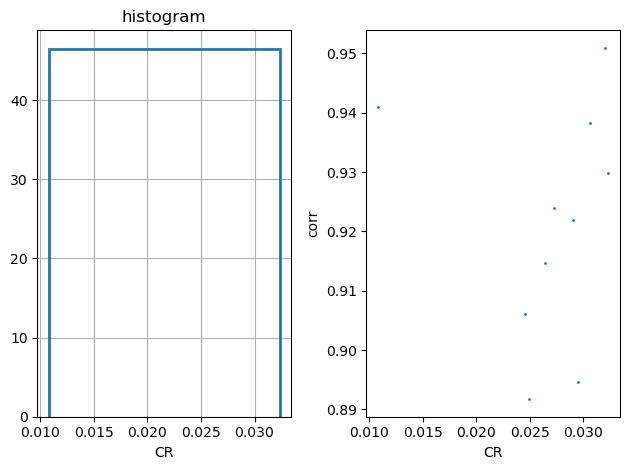

In [6]:
CR_zeta1 = [l['implicitPolyDictList'][0]['CR_zeta1'].item() for l in IRAS_runOnCoordinatesResultsDict['k3']]
corrs = [np.abs(pd.Series(l['implicitPolyDictList'][0]['hypotheses_regulations'].flatten()).corr(pd.Series(l['implicitPolyDictList'][0]['combination'].detach().numpy().flatten()))) for l in IRAS_runOnCoordinatesResultsDict['k3']]
print(f'median of CR = {np.median(np.asarray(CR_zeta1))}')
selectedSolIdx = np.argmin(np.abs(np.median(np.asarray(CR_zeta1)) - np.asarray(CR_zeta1)))
print(f'selectedSolIdx = {selectedSolIdx}')
print(f'corr in selected sol = {corrs[selectedSolIdx]}')
plt.figure()
plt.subplot(1,2,1)
plt.hist(CR_zeta1,bins=int(len(CR_zeta1)/10),density=True,log=False,cumulative=False, histtype='step',linewidth=2, label=f'CR')
plt.xlabel('CR')
plt.title('histogram')
plt.grid()
plt.subplot(1,2,2)
plt.scatter(x=CR_zeta1, y=corrs, s=1)
plt.xlabel('CR')
plt.ylabel('corr')
plt.tight_layout()
plt.show()

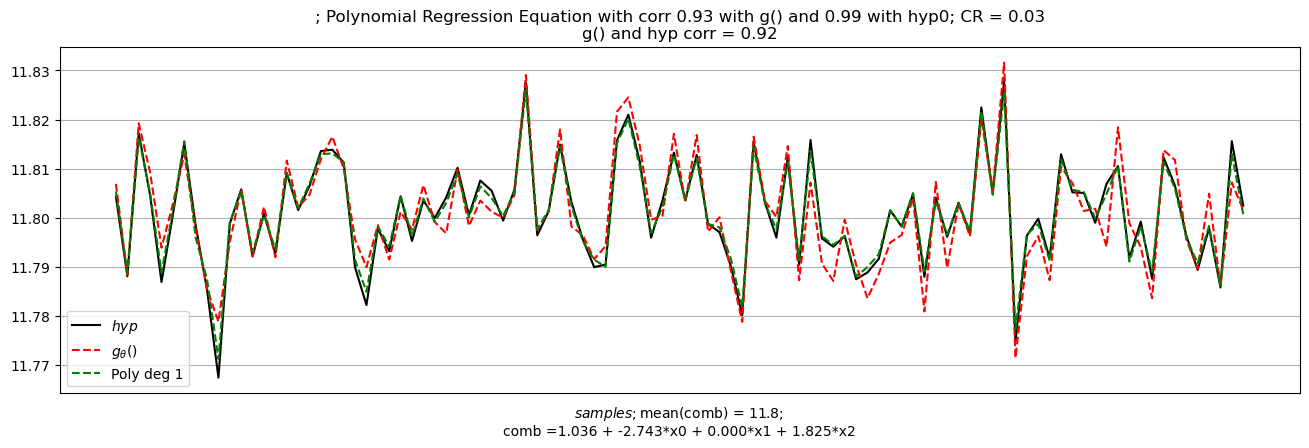

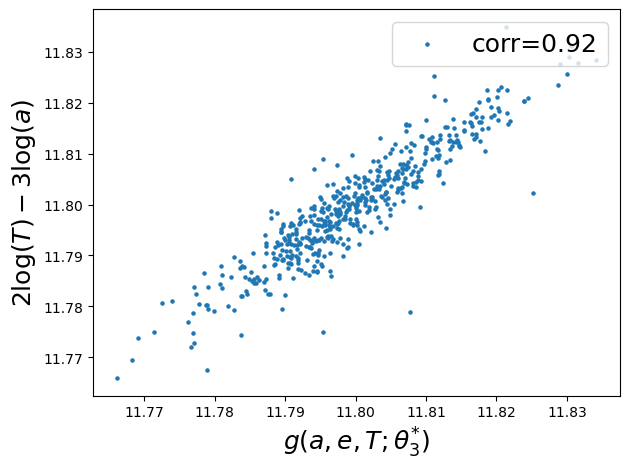

In [7]:

print_IRAS_res(IRAS_runOnCoordinatesResultsDict['k3'][selectedSolIdx], 0)


In [ ]:
# Initialize plot
#different_plots(planets, true_anomaly_values_df, orbitalObs_df)

In [ ]:
# plot planets before and after transformation to Perifocal frame:
#perifocal_trans_plot(planets, orbitalObs_df, orbitalParams_df)

Run IRAS on Mercury coordinates:

In [ ]:
enableIRAS_train = False
if enableIRAS_train:
    IRAS_runOnCoordinatesResultsDict = dict()
    IRAS_runOnCoordinatesResultsDict['Mercury'] = runIRAS('Mercury', true_anomaly_values_df, orbitalObs_df, orbitalParams_df)
    
    
    with open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'wb') as file:
        pickle.dump(IRAS_runOnCoordinatesResultsDict, file)


In [ ]:
IRAS_runOnCoordinatesResultsDict = pickle.load(open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'rb'))

highScoreHyp = get_highScoreHyp(IRAS_runOnCoordinatesResultsDict['Mercury'])
print_IRAS_res(IRAS_runOnCoordinatesResultsDict['Mercury'], highScoreHyp)
plot_manifold(IRAS_runOnCoordinatesResultsDict['Mercury'], highScoreHyp, true_anomaly_values_df, orbitalObs_df, orbitalParams_df, title3D=r'$g(r;\theta^{*}_{1.0,\mathrm{Mercury}})=0$')

In [10]:
alpha = 1e-2
orbitalParams_df['est_orbitalPlaneNormal'] = orbitalParams_df.apply(lambda row: add_est_orbitalPlaneNormal(row, 'Mercury', IRAS_runOnCoordinatesResultsDict['Mercury']['implicitPolyDictList'][0]['coefficients'][1:][:,None], 'est_orbitalPlaneNormal'), axis=1)
orbitalObs_df['r_proj2EstOrbitalPlane'] = orbitalObs_df.apply(lambda row: proj_r_2EstOrbitalPlane(row, orbitalParams_df), axis=1)
orbitalObs_df['r_2D_est'] = orbitalObs_df.apply(lambda row: transform_2_2D(row, orbitalParams_df, np.array([[1], [0], [0]]), est=True), axis=1)
orbitalObs_df['r_2D_est_noisy'] = orbitalObs_df.apply(lambda row: convert_to_r(row, orbitalObs_df, orbitalParams_df, alpha, workOn2D_est=True, est=True), axis=1)


orbitalObs_df['v_proj2EstOrbitalPlane'] = orbitalObs_df.apply(lambda row: proj_r_2EstOrbitalPlane(row, orbitalParams_df, to_v=True), axis=1)
orbitalObs_df['v_2D_est'] = orbitalObs_df.apply(lambda row: transform_2_2D(row, orbitalParams_df, np.array([[1], [0], [0]]), est=True, to_v=True), axis=1)
orbitalObs_df['v_2D_est_noisy'] = orbitalObs_df.apply(lambda row: convert_to_r(row, orbitalObs_df, orbitalParams_df, alpha, workOn2D_est=True, to_v=True, est=True), axis=1)
orbitalObs_df['L_2D_est'] = orbitalObs_df.apply(lambda row: calc_L(row, twoD=True, est=True), axis=1)
orbitalObs_df['L_2D_est_noisy'] = orbitalObs_df.apply(lambda row: calc_L(row, twoD=True, est=True, noisy=True), axis=1)

/Users/ron.teichner/Projects/IRAS/kepler_func.py:500: RuntimeWarning: invalid value encountered in divide
  return r - (n.T@r / np.power(np.linalg.norm(n), 2)) * n
/Users/ron.teichner/Projects/IRAS/kepler_func.py:410: RuntimeWarning: invalid value encountered in divide
  u = (np.cross(normal[:,0],a[:,0]) / np.linalg.norm(np.cross(normal[:,0],a[:,0])))[:,None]
/Users/ron.teichner/Projects/IRAS/kepler_func.py:500: RuntimeWarning: invalid value encountered in divide
  return r - (n.T@r / np.power(np.linalg.norm(n), 2)) * n
/Users/ron.teichner/Projects/IRAS/kepler_func.py:410: RuntimeWarning: invalid value encountered in divide
  u = (np.cross(normal[:,0],a[:,0]) / np.linalg.norm(np.cross(normal[:,0],a[:,0])))[:,None]


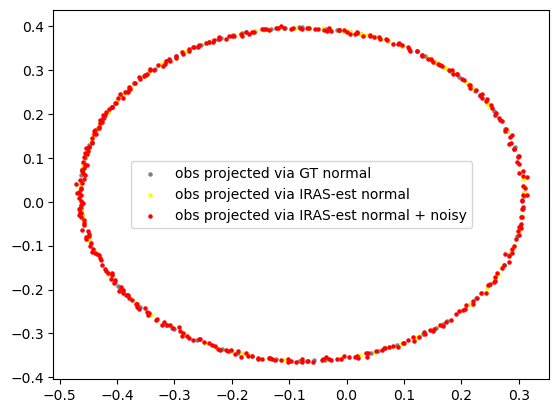

In [11]:
Obs = orbitalObs_df[orbitalObs_df['target'] == 'Mercury']

alpha = np.asarray([Obs['r_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
beta = np.asarray([Obs['r_2D'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])

alpha_hat = np.asarray([Obs['r_2D_est'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
beta_hat = np.asarray([Obs['r_2D_est'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])

alpha_hat_noisy = np.asarray([Obs['r_2D_est_noisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
beta_hat_noisy = np.asarray([Obs['r_2D_est_noisy'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])

plt.figure()
indices = np.random.permutation(np.arange(len(alpha_hat)))[:int(0.3*len(alpha_hat))]
plt.scatter(x=alpha[indices], y=beta[indices], s=5, color=colors['Mercury'], label='obs projected via GT normal')
indices = np.random.permutation(np.arange(len(alpha_hat)))[:int(0.3*len(alpha_hat))]
plt.scatter(x=alpha_hat[indices], y=beta_hat[indices], s=5, color='yellow', label='obs projected via IRAS-est normal')
indices = np.random.permutation(np.arange(len(alpha_hat)))
plt.scatter(x=alpha_hat_noisy[indices], y=beta_hat_noisy[indices], s=5, color='red', label='obs projected via IRAS-est normal + noisy')
plt.legend()
plt.show()

In [12]:
enableIRAS_train = False
if enableIRAS_train:
    IRAS_runOnCoordinatesResultsDict['Mercury2D'] = runIRAS('Mercury', true_anomaly_values_df, orbitalObs_df, orbitalParams_df, runOn2D=True, externalReport=True)


with open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'wb') as file:
    pickle.dump(IRAS_runOnCoordinatesResultsDict, file)


In [13]:
IRAS_runOnCoordinatesResultsDict = pickle.load(open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'rb'))
IRAS_runOnCoordinatesResultsDict['Mercury2D']['implicitPolyDictList'][0]['ellipse_fit']



{'ellipse_eq': '6.6879(x - -0.0776)² + 0.1267(x - -0.0776)(y - 0.0175) + 6.9539(y - 0.0175)²',
 'corr': -0.9922929012222913,
 'ellipse_params': {'A': 6.687902514371235,
  'B': 0.12665375617568428,
  'C': 6.95387640207804,
  'h': -0.07764258071929922,
  'k': 0.017545304034481596},
 'ellipse_rot_angle': -0.22220887542672876,
 'axes_eccentricity': {'a': 0.38709725752640445,
  'b': 0.3788263506513203,
  'e': 0.20561235107050224},
 'focci': ((-0.15527763213002813, 0.03508616003183444),
  (-7.529308570314308e-06, 4.448037128748639e-06))}

In [14]:
orbitalObs_df['r_2D_est_proj2estEllipse'] = orbitalObs_df.apply(lambda row: project_point_to_ellipse(row, IRAS_runOnCoordinatesResultsDict['Mercury2D']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params']), axis=1)
orbitalObs_df['r_2D_est_sign_y'] = orbitalObs_df.apply(lambda row: replace_y_with_sign(row, IRAS_runOnCoordinatesResultsDict['Mercury2D']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params']), axis=1)
orbitalObs_df['r_2D_est_sign_y_noisy'] = orbitalObs_df.apply(lambda row: replace_y_with_sign(row, IRAS_runOnCoordinatesResultsDict['Mercury2D']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params'], noisy=True), axis=1)

Pearson correlation between g() and estimated ellipse is 0.992


/Users/ron.teichner/Projects/IRAS/kepler_func.py:745: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=[1], colors='blue', label='fitted ellipse for IRAS g()')


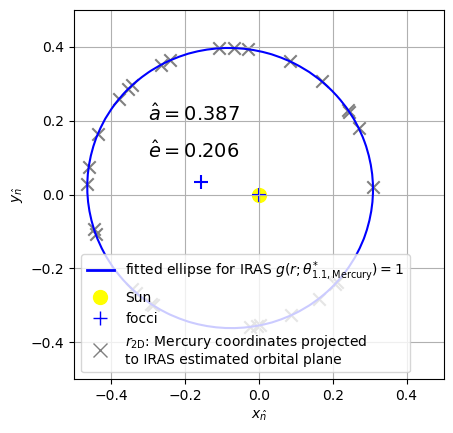

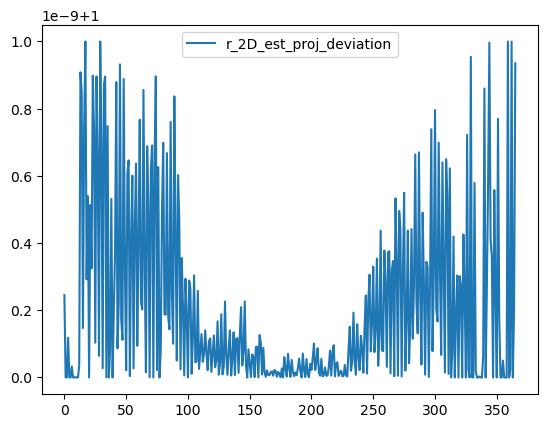

In [15]:
plot_est2D_ellipse(IRAS_runOnCoordinatesResultsDict, 'Mercury', orbitalParams_df, orbitalObs_df, title=r'$g(r; \theta^{*}_{1.1,\mathrm{Mercury}})=1$')

In [16]:
enableIRAS_train = False
if enableIRAS_train:
    IRAS_runOnCoordinatesResultsDict['Mercury2D_v'] = runIRAS('Mercury', true_anomaly_values_df, orbitalObs_df, orbitalParams_df, runOn2D_v=True, externalReport=True)


with open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'wb') as file:
    pickle.dump(IRAS_runOnCoordinatesResultsDict, file)

In [17]:
IRAS_runOnCoordinatesResultsDict = pickle.load(open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'rb'))
IRAS_runOnCoordinatesResultsDict['Mercury2D_v']['implicitPolyDictList'][0]['ellipse_fit']




{'ellipse_eq': '1252.8462(x - 0.0013)² + -0.0068(x - 0.0013)(y - 0.0057) + 1252.8372(y - 0.0057)²',
 'corr': -0.9110708500452673,
 'ellipse_params': {'A': 1252.8461763468251,
  'B': -0.006824282443533201,
  'C': 1252.837176956323,
  'h': 0.0012805473043526116,
  'k': 0.005666729997624199},
 'ellipse_rot_angle': -0.3243975643818092,
 'axes_eccentricity': {'a': 0.028252239731150066,
  'b': 0.028252112385904953,
  'e': 0.003002475234741978},
 'focci': ((0.0012535098420187749, 0.005586327658100465),
  (0.0013075847666864484, 0.005747132337147933))}

In [18]:
orbitalObs_df['v_2D_est_proj2estEllipse'] = orbitalObs_df.apply(lambda row: project_point_to_ellipse(row, IRAS_runOnCoordinatesResultsDict['Mercury2D_v']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params'], to_v=True), axis=1)
orbitalObs_df['v_2D_est_sign_x'] = orbitalObs_df.apply(lambda row: replace_y_with_sign(row, IRAS_runOnCoordinatesResultsDict['Mercury2D_v']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params'], replace_x=True, to_v=True), axis=1)
orbitalObs_df['v_2D_est_sign_x_noisy'] = orbitalObs_df.apply(lambda row: replace_y_with_sign(row, IRAS_runOnCoordinatesResultsDict['Mercury2D_v']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params'], replace_x=True, to_v=True, noisy=True), axis=1)
orbitalObs_df['L_2D_est_sign'] = orbitalObs_df.apply(lambda row: calc_L(row, twoD=True, est=True, proj2Ellipse=False, sign=True, ellipse_params_r=IRAS_runOnCoordinatesResultsDict['Mercury2D']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params'], ellipse_params_v=IRAS_runOnCoordinatesResultsDict['Mercury2D_v']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params']), axis=1)
orbitalObs_df['L_2D_est_sign_noisy'] = orbitalObs_df.apply(lambda row: calc_L(row, twoD=True, est=True, proj2Ellipse=False, sign=True, noisy=True, ellipse_params_r=IRAS_runOnCoordinatesResultsDict['Mercury2D']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params'], ellipse_params_v=IRAS_runOnCoordinatesResultsDict['Mercury2D_v']['implicitPolyDictList'][0]['ellipse_fit']['ellipse_params']), axis=1)

Pearson correlation between g() and estimated ellipse is 0.911


/Users/ron.teichner/Projects/IRAS/kepler_func.py:745: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=[1], colors='blue', label='fitted ellipse for IRAS g()')


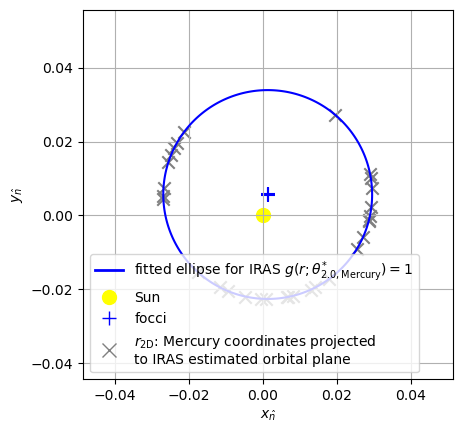

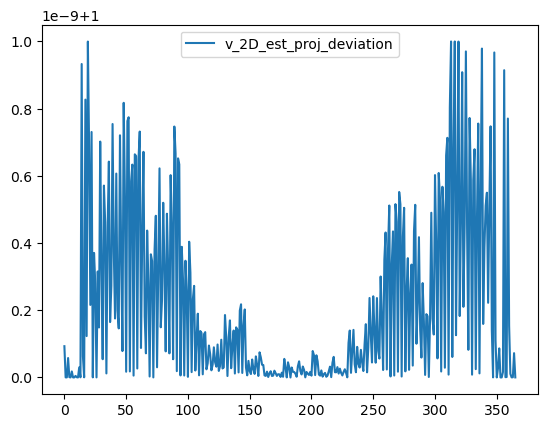

In [19]:
plot_est2D_ellipse(IRAS_runOnCoordinatesResultsDict, 'Mercury', orbitalParams_df, orbitalObs_df, to_v=True, title=r'$g(r; \theta^{*}_{2.0,\mathrm{Mercury}})=1$')

In [ ]:
alpha = 1e-2
orbitalObs_df['r_2D_est_proj2estEllipse_noisy'] = orbitalObs_df.apply(lambda row: convert_to_r(row, orbitalObs_df, orbitalParams_df, alpha, workOn2D_Proj=True, to_v=False, est=True), axis=1)
orbitalObs_df['v_2D_est_proj2estEllipse_noisy'] = orbitalObs_df.apply(lambda row: convert_to_r(row, orbitalObs_df, orbitalParams_df, alpha, workOn2D_Proj=True, to_v=True, est=True), axis=1)
orbitalObs_df['L_2D_est_proj2estEllipse'] = orbitalObs_df.apply(lambda row: calc_L(row, twoD=True, est=True, proj2Ellipse=True), axis=1)
orbitalObs_df['L_2D_est_proj2estEllipse_noisy'] = orbitalObs_df.apply(lambda row: calc_L(row, twoD=True, est=True, noisy=True, proj2Ellipse=True), axis=1)

In [ ]:
Obs = orbitalObs_df[orbitalObs_df['target'] == 'Mercury']

#x = np.asarray([Obs['r_2D_est_proj2estEllipse'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
#y = np.asarray([Obs['r_2D_est_proj2estEllipse'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
#vx = np.asarray([Obs['v_2D_est_proj2estEllipse'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
#vy = np.asarray([Obs['v_2D_est_proj2estEllipse'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
#L_2D_est_proj2estEllipse = np.asarray([Obs['L_2D_est_proj2estEllipse'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
#L_2D_est_proj2estEllipse_noisy = np.asarray([Obs['L_2D_est_proj2estEllipse_noisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])

x = np.asarray([Obs['r_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
y = np.asarray([Obs['r_2D'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
vx = np.asarray([Obs['v_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
vy = np.asarray([Obs['v_2D'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
L_2D = np.asarray([Obs['L_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
L_2D_noisy = np.asarray([Obs['L_2D_noisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
L_2D_est_sign = np.asarray([Obs['L_2D_est_sign'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])


plt.figure()
plt.subplot(5,1,1)
plt.plot(x, label='x')
plt.legend()
plt.subplot(5,1,2)
plt.plot(y, label='y')
plt.legend()
plt.subplot(5,1,3)
plt.plot(vx, label='vx')
plt.legend()
plt.subplot(5,1,4)
plt.plot(vy, label='vy')
plt.legend()
plt.subplot(5,1,5)
plt.plot(L_2D, label='L_2D')
#plt.plot(L_2D_est_proj2estEllipse_noisy, label='L_2D_est_proj2estEllipse_noisy')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
#plt.plot(x*vy, label='x*vy')
#plt.plot(-y*vx, label='-y*vx')
plt.plot(x*vy-y*vx, label='x*vy-y*vx')
plt.plot(L_2D_est_sign, label='L_2D_est_sign')
#plt.plot(x*vy+y*vx, label='x*vy+y*vx')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure()
plt.plot(x*vy, label='x*vy')
plt.plot(-y*vx, label='-y*vx')
plt.plot(x*vy-y*vx, label='x*vy-y*vx')
#plt.plot(x*vy+y*vx, label='x*vy+y*vx')
plt.legend()
plt.tight_layout()
plt.show()


Lx = np.asarray([Obs['L'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Ly = np.asarray([Obs['L'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
Lz = np.asarray([Obs['L'].to_numpy()[i][2,0] for i in range(Obs.shape[0])])

plt.figure()
plt.subplot(3,1,1)
plt.plot(Lx, label='Lx')
plt.legend()
plt.subplot(3,1,2)
plt.plot(Ly, label='Ly')
plt.legend()
plt.subplot(3,1,3)
plt.plot(Lz, label='Lz')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
enableIRAS_train = True
if enableIRAS_train:
    IRAS_runOnCoordinatesResultsDict['Mercury_2DK2'] = runIRAS('Mercury', true_anomaly_values_df, orbitalObs_df, orbitalParams_df, runCoordinates_n_Velocities=True, externalReport=True)
    #IRAS_runOnCoordinatesResultsDict['Planets_2DK2'] = runIRAS(list(planets.keys()), true_anomaly_values_df, orbitalObs_df, orbitalParams_df, runCoordinates_n_Velocities=True, externalReport=True)


with open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'wb') as file:
    pickle.dump(IRAS_runOnCoordinatesResultsDict, file)


In [ ]:
IRAS_runOnCoordinatesResultsDict = pickle.load(open('/Users/ron.teichner/Library/CloudStorage/OneDrive-Technion/Kepler/IRAS_results.pkl', 'rb'))

highScoreHyp = get_highScoreHyp(IRAS_runOnCoordinatesResultsDict['Mercury_2DK2'])
print_IRAS_res(IRAS_runOnCoordinatesResultsDict['Mercury_2DK2'], highScoreHyp)

In [ ]:
x = np.asarray([Obs['r_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
y = np.asarray([Obs['r_2D'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
vx = np.asarray([Obs['v_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
vy = np.asarray([Obs['v_2D'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])

L_2D = np.asarray([Obs['L_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])


implicitPolyDict = IRAS_runOnCoordinatesResultsDict['Mercury_2DK2']['implicitPolyDictList'][get_highScoreHyp(IRAS_runOnCoordinatesResultsDict['Mercury_2DK2'])]
x_IRAS_solutions_list = [solve_for_x0(implicitPolyDict['coefficients'], implicitPolyDict['intercept'], *row) for row in zip(y,vx,vy,0*np.mean(L_2D)*np.ones(len(x)))]
x_angularMomentumSol = (np.mean(L_2D) + y*vx)/vy

x_IRAS_solutions_list = [l[np.argmin(np.abs(np.asarray(l)-xs))] for l,xs in zip(x_IRAS_solutions_list,x)]

plt.figure()
plt.plot(x_IRAS_solutions_list*vy-y*vx, label='x(IRAS)*vy-y*vx')
plt.plot(x*vy-y*vx, label='x*vy-y*vx')
plt.legend()
plt.tight_layout()
plt.show()


x_error_IRAS = x - x_IRAS_solutions_list
x_error_angular = x - x_angularMomentumSol

plt.figure()
formattedIRAS = f"{round(np.var(x_error_IRAS) / np.var(x), 12):.12e}"
formattedAngular = f"{round(np.var(x_error_angular) / np.var(x), 12):.12e}"
plt.plot(x_error_IRAS**2 / np.var(x), label=formattedIRAS)
plt.plot(x_error_angular**2 / np.var(x), label=formattedAngular)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(x,vx,s=1)
plt.xlabel = 'x'
plt.ylabel = 'vx'
plt.show()

plt.figure()
plt.scatter(x,vy,s=1)
plt.xlabel = 'x'
plt.ylabel = 'vy'
plt.show()


In [ ]:
x_IRAS_solutions_list = [l[np.argmin(np.abs(np.asarray(l)-xs))] for l,xs in zip(x_IRAS_solutions_list,x)]

x_IRAS_solutions_list

In [ ]:
# IRAS_train_script(observations, observations_tVec, hypotheses_regulations, titleStr='', nativeIRAS=True)
# with observations having shape of (N x T x F) and observations_tVec (N x T x 1). 
# Here N is the number of observed timeseries, T is the number of samples in each timeseries and F the number of observables. 
# The observations are in the variable observations and their corresponding times in observations_tVec. 
# In the input V the user can place an hypothesis. 
# The Pearson correlation between the hypothesis and the output of the algorithm is printed and their figure is plotted.
#   playerPerPatient = False

In [ ]:
Obs = orbitalObs_df[orbitalObs_df['target'] == 'Mercury']

vx = np.asarray([Obs['v'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
vy = np.asarray([Obs['v'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])

vx_n = np.asarray([Obs['vNoisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
vy_n = np.asarray([Obs['vNoisy'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])

plt.figure()
plt.scatter(x=vx, y=vy, s=1, label='v')
plt.scatter(x=vx_n, y=vy_n, s=1, label='v_noisy')
plt.legend()
plt.show()


In [ ]:
Obs.columns

In [ ]:
Obs = orbitalObs_df[orbitalObs_df['target'] == 'Mercury']

In [ ]:
Obs.columns

In [ ]:
Obs = orbitalObs_df[orbitalObs_df['target'] == 'Mercury']
Lx = np.asarray([Obs['L'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Ly = np.asarray([Obs['L'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
Lz = np.asarray([Obs['L'].to_numpy()[i][2,0] for i in range(Obs.shape[0])])

Lx_n = np.asarray([Obs['L_Noisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Ly_n = np.asarray([Obs['L_Noisy'].to_numpy()[i][1,0] for i in range(Obs.shape[0])])
Lz_n = np.asarray([Obs['L_Noisy'].to_numpy()[i][2,0] for i in range(Obs.shape[0])])


plt.figure()
plt.subplot(1,3,1)
plt.plot(Lx_n, label='Lx_n')
plt.plot(Lx, label='Lx')
plt.legend()

plt.subplot(1,3,2)
plt.plot(Ly_n, label='Ly_n')
plt.plot(Ly, label='Ly')
plt.legend()

plt.subplot(1,3,3)
plt.plot(Lz_n, label='Lz_n')
plt.plot(Lz, label='Lz')
plt.legend()

plt.tight_layout()
plt.show()
############
Lx_2D = np.asarray([Obs['L_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Lx_2D_est = np.asarray([Obs['L_2D_est'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Lx_2D_est_noisy = np.asarray([Obs['L_2D_est_noisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])


plt.figure()
#plt.plot(Lx_n, label='Lx_n')
plt.plot(Lx_2D, label='Lx_2D')
plt.plot(Lx_2D_est, label='Lx_2D_est')
plt.plot(Lx_2D_est_noisy, label='Lx_2D_est_noisy')
plt.legend()

plt.tight_layout()
plt.show()

Obs = orbitalObs_df[orbitalObs_df['target'] == 'Mars']
Lx_2D = np.asarray([Obs['L_2D'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Lx_2D_est = np.asarray([Obs['L_2D_est'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])
Lx_2D_est_noisy = np.asarray([Obs['L_2D_est_noisy'].to_numpy()[i][0,0] for i in range(Obs.shape[0])])

plt.figure()
#plt.plot(Lx_n, label='Lx_n')
plt.plot(Lx_2D, label='Lx_2D')
plt.plot(Lx_2D_est, label='Lx_2D_est')
plt.plot(Lx_2D_est_noisy, label='Lx_2D_est_noisy')
plt.legend()

plt.tight_layout()
plt.show()